In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

C:\Users\HO_YONG_KIAN\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df[["Age","Annual Income (k$)","Spending Score (1-100)"]].head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [28]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Check for missing values

In [29]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## One Hot Encode Gender Column

In [30]:
def one_hot(x):
    if x == "Male":
        return 1
    else:
        return 0
df["Gender_encoded"] = df["Gender"].apply(one_hot)
df.drop(["Gender"], axis=1).head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_encoded
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


## Exploratory Data Analysis

In [31]:
factors = [f for f in df.columns if f not in ["CustomerID", "Gender_encoded"]]
factors

['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

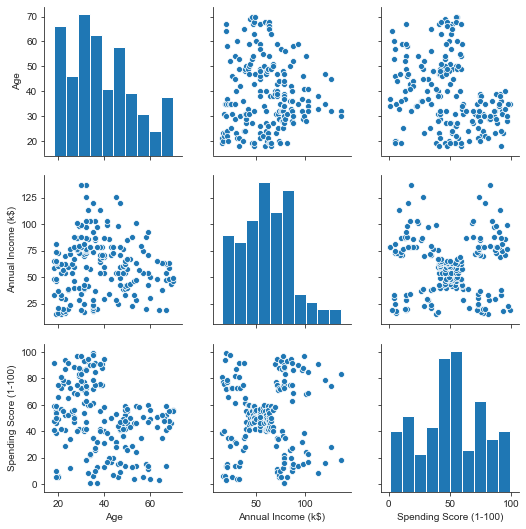

In [32]:
sns.set_style("ticks")
sns.pairplot(df[factors])

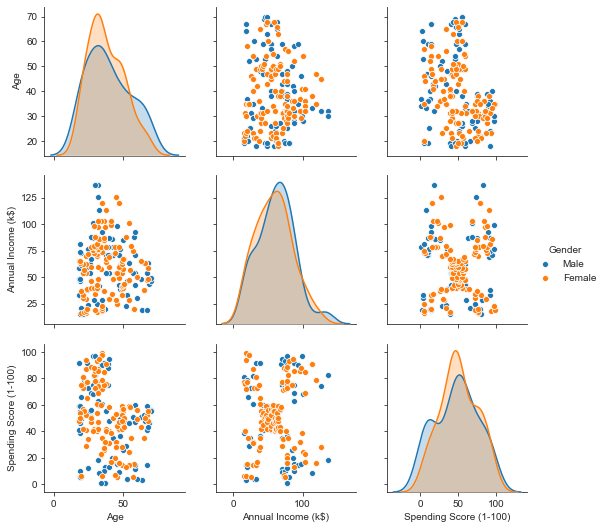

In [34]:
sns.pairplot(df[factors], hue="Gender")

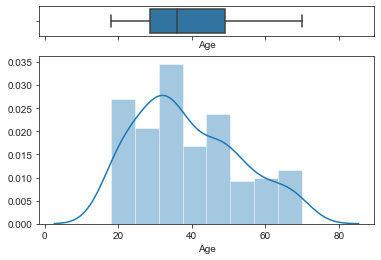

In [50]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["Age"], ax=ax_box)
sns.distplot(df["Age"], ax=ax_hist)

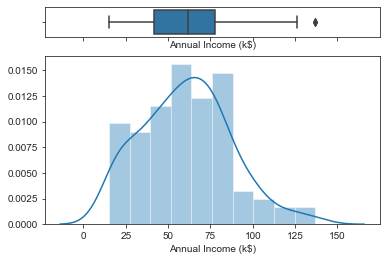

In [51]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["Annual Income (k$)"], ax=ax_box)
sns.distplot(df["Annual Income (k$)"], ax=ax_hist)

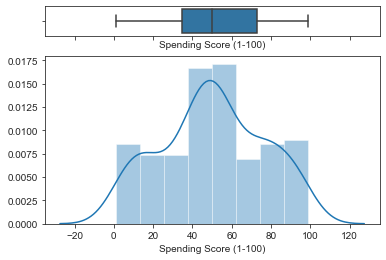

In [52]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["Spending Score (1-100)"], ax=ax_box)
sns.distplot(df["Spending Score (1-100)"], ax=ax_hist)

## Association Ruling

In [55]:
from mlxtend.frequent_patterns import apriori, association_rules

In [56]:
def cat_age(x):
    if x>=0 and x<20:
        return "age - teen"
    elif x>=20 and x<40:
        return "age - young adult"
    elif x>=60 and x<80:
        return "age - senior adult"
    elif x>=80 and x<100:
        return "age - elderly"
    
def cat_income(x):
    if x>=0 and x<40:
        return "average"
    elif x>=40 and x<90:
        return "well-to-do"
    elif x>=90 and x<120:
        return "rich"
    elif x>=120:
        return "very rich"

def spending_score(x):
    if x>=0 and x<30:
        return "poor"
    elif x>=30 and x<60:
        return "average"
    elif x>=60 and x<90:
        return "strong"
    elif x>=90:
        return "very strong"
    
df["cat_age"] = df["Age"].apply(cat_age)
df["cat_sc"] = df["Spending Score (1-100)"].apply(spending_score)
df["cat_ai"] = df["Annual Income (k$)"].apply(cat_income)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_encoded,cat_age,cat_sc,cat_ai
0,1,Male,19,15,39,1,age - teen,average,average
1,2,Male,21,15,81,1,age - young adult,strong,average
2,3,Female,20,16,6,0,age - young adult,poor,average
3,4,Female,23,16,77,0,age - young adult,strong,average
4,5,Female,31,17,40,0,age - young adult,average,average


In [59]:
df_association = df[["Gender","cat_age","cat_sc","cat_ai"]]
df_association.head()

,Gender,cat_age,cat_sc,cat_ai
0,Male,age - teen,average,average
1,Male,age - young adult,strong,average
2,Female,age - young adult,poor,average
3,Female,age - young adult,strong,average
4,Female,age - young adult,average,average


In [61]:
df_association = pd.get_dummies(df_association).head()

In [67]:
freq_items  = apriori(df_association, min_support=0.10, use_colnames=True)
rules = association_rules(freq_items, metric="confidence", min_threshold=0.70)
rules = rules.sort_values(["confidence"], ascending=["False"])
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(cat_age_age - young adult),(Gender_Female),0.8,0.6,0.6,0.75,1.25,0.12,1.6
24,(cat_age_age - young adult),"(cat_ai_average, Gender_Female)",0.8,0.6,0.6,0.75,1.25,0.12,1.6
21,"(cat_age_age - young adult, cat_ai_average)",(Gender_Female),0.8,0.6,0.6,0.75,1.25,0.12,1.6
11,(cat_ai_average),(cat_age_age - young adult),1.0,0.8,0.8,0.80,1.00,0.00,1.0
59,"(cat_age_age - young adult, cat_sc_poor, Gende...",(cat_ai_average),0.2,1.0,0.2,1.00,1.00,0.00,inf


## Clustering

In [110]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

In [75]:
df_cluster = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [76]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)
df_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

C:\Users\HO_YONG_KIAN\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


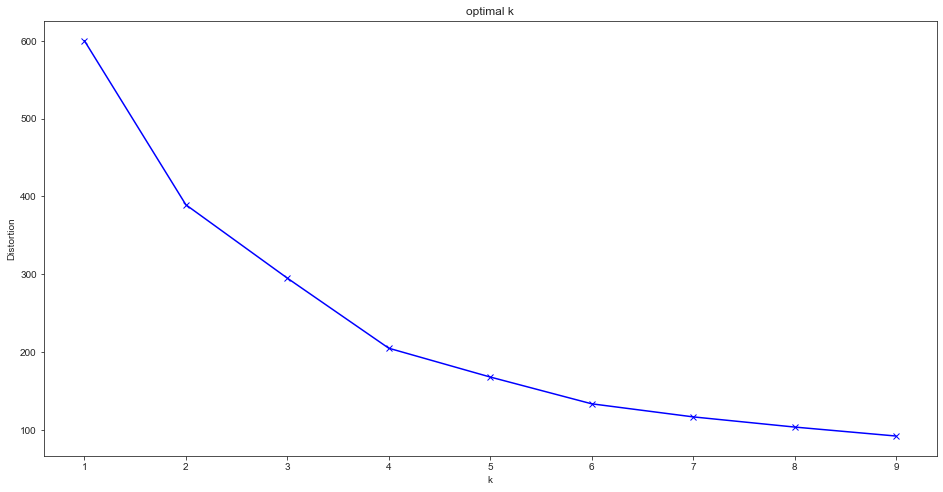

In [77]:
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("optimal k")
plt.show()

In [84]:
X_k1 = df[['Annual Income (k$)','Spending Score (1-100)', 'Age']].iloc[: , :].values

In [85]:
model = KMeans(n_clusters=5)
model.fit(X_k1)

KMeans(n_clusters=5)

In [86]:
y_kmeans = model.fit_predict(X_k1)

In [87]:
model.labels_

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

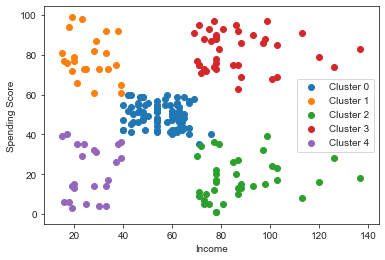

In [88]:
unique_labels = set(model.labels_)
for c in unique_labels:  
    plt.scatter(X_k1[model.labels_ == c, 0],
                X_k1[model.labels_ == c, 1],
                label='Cluster {}'.format(c))
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## Classification

In [91]:
df_class = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
df_target = pd.DataFrame({"Clusters": model.labels_})
df_class = pd.concat([df_class, df_target], axis=1, sort=False)
df_class.head(5)

,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,19,15,39,4
1,21,15,81,1
2,20,16,6,4
3,23,16,77,1
4,31,17,40,4


In [103]:
X_new = df_class.drop(['Clusters'],axis=1).values
y_new = df_class['Clusters'].values
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,stratify=y_new,test_size=0.25,random_state=42)

In [112]:
def load_up_classifier(classifer, x_train, x_test, y_train, y_test):
    pipe = Pipeline([
        ('standardiser', StandardScaler()),
        ('model', classifer)
    ])
    
    model = pipe.fit(x_train, y_train)
    prediction = model.predict(x_test)
    probs = model.predict_proba(x_test)
    return model, probs

def confusion_matrixes(model_list, model_names):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
    for cls, ax, model_name in zip(model_list, axes.flatten(),model_names):
        plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=["1","2","3","4","5"])
        ax.title.set_text(model_name)
    
    plt.tight_layout()  
    plt.show()

In [108]:
classifier_list = [LogisticRegression(),BernoulliNB(),GradientBoostingClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
model_list = []
probs_list = []

for classifier in classifier_list:
    train_model, probs = load_up_classifier(classifier,X_train, X_test, y_train, y_test)
    model_list.append(train_model)
    probs_list.append(probs)

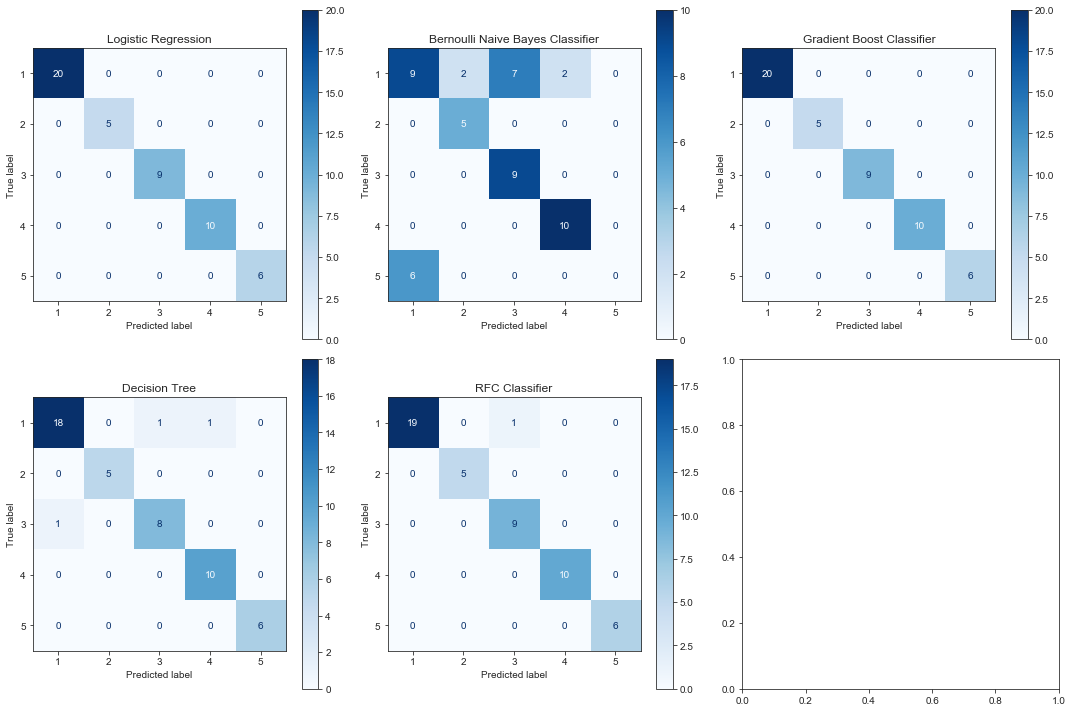

In [114]:
model_names = ["Logistic Regression",'Bernoulli Naive Bayes Classifier','Gradient Boost Classifier','Decision Tree','RFC Classifier']
confusion_matrixes(model_list=model_list,model_names=model_names)

## Save model

In [115]:
import pickle

pkl_filename_1, pkl_filename_2,pkl_filename_3,pkl_filename_4,pkl_filename_5 = "LG_model.pkl","BN_model.pkl","GB_model.pkl","DT_model.pkl","RFC_model.pkl"
with open(pkl_filename_1, 'wb') as file:
    pickle.dump(model_list[0], file)
    
with open(pkl_filename_2, 'wb') as file:
    pickle.dump(model_list[1], file)
    
with open(pkl_filename_3, 'wb') as file:
    pickle.dump(model_list[2], file)
    
with open(pkl_filename_4, 'wb') as file:
    pickle.dump(model_list[3], file)
    
with open(pkl_filename_5, 'wb') as file:
    pickle.dump(model_list[4], file)